In [33]:
import nltk                                 
from nltk.corpus import twitter_samples, stopwords 
import matplotlib.pyplot as plt             
import numpy as np                          
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [34]:
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
def preprocessing_tweet(tweet):
    """
    Cleans the text, tokenizes it into separate words, removes stopwords, and converts words to stems.
    Input:
        tweet: a string containing a tweet
    Output:
        clean_tweet: a list of words containing the processed tweet
    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tokenized_tweet = tokenizer.tokenize(tweet)
    clean_tweet = []
    for word in tokenized_tweet:
        if (word not in stopwords_english and 
                word not in string.punctuation):
            stem_word = stemmer.stem(word)
            clean_tweet.append(stem_word)

    return clean_tweet

In [36]:
def build_frequency_dict(tweets, np_label):
    """
    Input:
        tweets: a list of tweets
        np_label: an m x 1 array with label of each tweet
    Output:
        frequency_dict: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    label_list = np.squeeze(np_label).tolist()
    frequency_dict = {}
    for tweet,label in zip(tweets,label_list):
        for token in preprocessing_tweet(tweet): #gets tokenized tweet
            if (token, label) in frequency_dict:
                frequency_dict[(token, label)] += 1 # a tuple of (word,label)
                # freqs[(token, label)] = freqs.get((token, label), 0) + 1
            else:
                frequency_dict[(token, label)] = 1
    return frequency_dict

### loading dataset

In [37]:
pos_tweets = twitter_samples.strings('positive_tweets.json')
neg_tweets = twitter_samples.strings('negative_tweets.json')
tweets = pos_tweets + neg_tweets
print('len of tweets: ',len(tweets))

len of tweets:  10000


In [38]:
labels = np.append(np.ones((len(pos_tweets))), np.zeros((len(neg_tweets))))

In [39]:
print(labels.shape)

(10000,)


In [40]:
word_frequency_dict=build_frequency_dict(tweets,labels)

In [41]:
print(f'length of dictionary :{len(word_frequency_dict)}') #vocab with freq for pos nd neg corpus

length of dictionary :13076


In [53]:
word_frequency_dict

{('followfriday', 1.0): 25,
 ('top', 1.0): 32,
 ('engag', 1.0): 7,
 ('member', 1.0): 16,
 ('commun', 1.0): 33,
 ('week', 1.0): 83,
 (':)', 1.0): 3568,
 ('hey', 1.0): 76,
 ('jame', 1.0): 7,
 ('odd', 1.0): 2,
 (':/', 1.0): 5,
 ('pleas', 1.0): 97,
 ('call', 1.0): 37,
 ('contact', 1.0): 7,
 ('centr', 1.0): 2,
 ('02392441234', 1.0): 1,
 ('abl', 1.0): 8,
 ('assist', 1.0): 1,
 ('mani', 1.0): 33,
 ('thank', 1.0): 620,
 ('listen', 1.0): 16,
 ('last', 1.0): 47,
 ('night', 1.0): 68,
 ('bleed', 1.0): 2,
 ('amaz', 1.0): 51,
 ('track', 1.0): 5,
 ('scotland', 1.0): 2,
 ('congrat', 1.0): 21,
 ('yeaaah', 1.0): 1,
 ('yipppi', 1.0): 1,
 ('accnt', 1.0): 2,
 ('verifi', 1.0): 2,
 ('rqst', 1.0): 1,
 ('succeed', 1.0): 1,
 ('got', 1.0): 69,
 ('blue', 1.0): 9,
 ('tick', 1.0): 1,
 ('mark', 1.0): 1,
 ('fb', 1.0): 6,
 ('profil', 1.0): 2,
 ('15', 1.0): 5,
 ('day', 1.0): 246,
 ('one', 1.0): 129,
 ('irresist', 1.0): 2,
 ('flipkartfashionfriday', 1.0): 17,
 ('like', 1.0): 233,
 ('keep', 1.0): 68,
 ('love', 1.0): 400,


### visualizing the information

In [42]:
keys = ['happi','good', 'bad','hate', 'sad', 'mad', 'best',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'play', 'hope']
data = []
for w in keys:
    pos_count= word_frequency_dict.get((w, 1),0)
    neg_count= word_frequency_dict.get((w, 0),0)
    data.append([w, pos_count, neg_count])
data

[['happi', 211, 25],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['hate', 13, 57],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['❤', 29, 21],
 [':)', 3568, 2],
 [':(', 1, 4571],
 ['😒', 1, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 2, 1],
 ['♛', 0, 210],
 ['play', 46, 48],
 ['hope', 141, 102]]

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0, flags=flags)


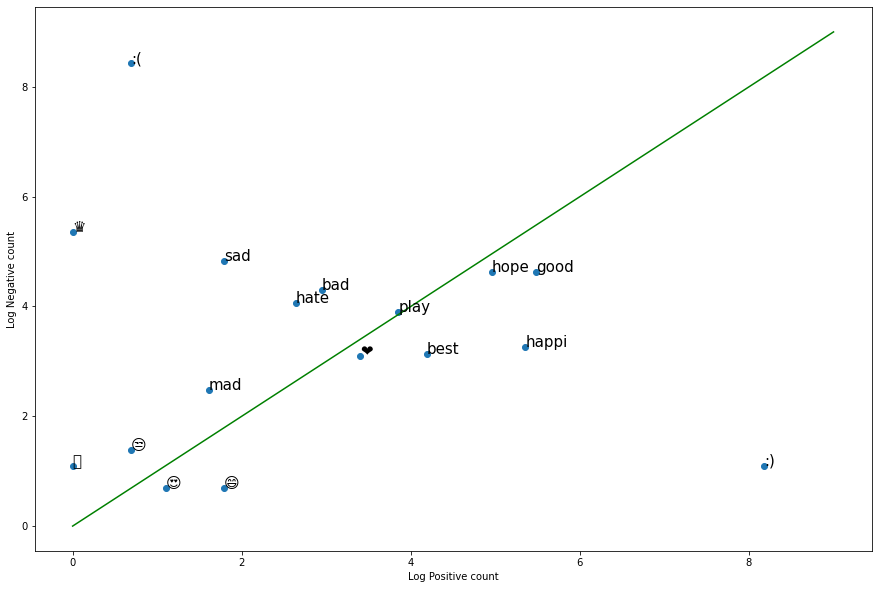

In [52]:
fig, ax = plt.subplots(figsize = (15,10))
# convert positive raw counts to logarithmic scale. adding 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])  
y = np.log([x[2] + 1 for x in data]) 

ax.scatter(x, y)  

plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=15)

ax.plot([0, 9], [0, 9], color = 'green')
plt.show()